This notebook is to do experiment to show how quantile, CVaR, variance changes when meeting more data point. This property might be helpful with the design of the ucb algorithm.

In [1]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
import math

### Samples from normal distribtuion

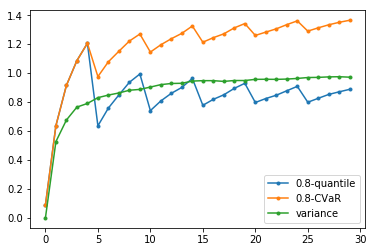

In [42]:
my_dict = defaultdict(list)
name = ['0.8-quantile', '0.8-VaR', 'variance']

num_exper = 500
num_samples = 30
alpha = 0.8

for exper in range(num_exper):
    sample_list = []
    quantile_list = []
    CVaR_list = []
    variance_list = []
    for i in range(num_samples):
        sample = np.random.normal(0,1)
        sample_list.append(sample)
        sorted_list = np.sort(sample_list)
        idx = int(len(sample_list) * alpha)
        quantile_list.append(sorted_list[idx])
        CVaR_list.append(np.mean(sorted_list[idx:]))
        variance_list.append(np.var(sample_list))
    my_dict['0.8-quantile'].append(quantile_list)
    my_dict['0.8-CVaR'].append(CVaR_list)
    my_dict['variance'].append(variance_list)

for key, value in my_dict.items():
    #print(len(value[0]))
    value = np.asarray(value)
    #print(value.shape)
    ave_value = np.average(value, axis = 0)
    plt.plot(ave_value, '.-', label = key)
plt.legend()

### Samples from skewed normal distribution

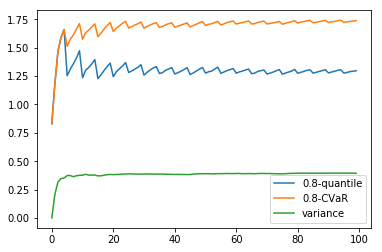

In [44]:
def rand_skew_norm(fAlpha, fLocation, fScale):
    sigma = fAlpha / np.sqrt(1.0 + fAlpha**2) 

    afRN = np.random.randn(2)
    u0 = afRN[0]
    v = afRN[1]
    u1 = sigma*u0 + np.sqrt(1.0 -sigma**2) * v 

    if u0 >= 0:
        return u1*fScale + fLocation 
    return (-u1)*fScale + fLocation 

def randn_skew(N, skew=0.0):
    return [rand_skew_norm(skew, 0, 1) for x in range(N)]


my_dict = defaultdict(list)
name = ['0.8-quantile', '0.8-VaR', 'variance']

num_exper = 100
num_samples = 100
alpha = 0.8

for exper in range(num_exper):
    sample_list = []
    quantile_list = []
    CVaR_list = []
    variance_list = []
    for i in range(num_samples):
        sample = randn_skew(1,4)[0]
        sample_list.append(sample)
        sorted_list = np.sort(sample_list)
        idx = int(len(sample_list) * alpha)
        quantile_list.append(sorted_list[idx])
        CVaR_list.append(np.mean(sorted_list[idx:]))
        variance_list.append(np.var(sample_list))
    my_dict['0.8-quantile'].append(quantile_list)
    my_dict['0.8-CVaR'].append(CVaR_list)
    my_dict['variance'].append(variance_list)

for key, value in my_dict.items():
    #print(len(value[0]))
    value = np.asarray(value)
    #print(value.shape)
    ave_value = np.average(value, axis = 0)
    plt.plot(ave_value, label = key)
plt.legend()

From the experiments, we know the value of emperical statistic properties grows when knowing a few data point, then variance is stable around the distribution variance, quantile and CVaR shows more fluctuation.

But all the values are stable around the true value after observing 100 samples for the simple distribution designed above. So for the quantile ucb, after a few hundreds arounds, the only thing changed is the alpha level (changing in terms of t).